In [8]:
import numpy as np
from sklearn.cluster import KMeans
import os, sys
from matplotlib import pyplot as plt

In [9]:
txt = r"D:\projects\RD\debug_IS_segmentation\image_coords_256x256.txt"
coords = np.loadtxt(txt)
coords.shape

(1000, 2)

In [10]:
clf = KMeans(n_clusters=3, random_state=10)
res = clf.fit_predict(coords, y=None)

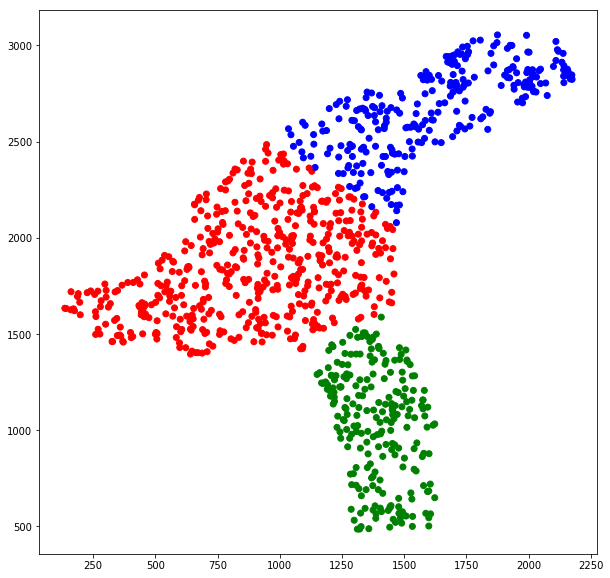

In [14]:
colors = ['r', 'g', 'b']
color_arr = [colors[r] for r in res]

plt.figure(figsize=(10,10))
plt.scatter(coords[:,0], coords[:,1], color=color_arr)

In [15]:
res[res==0].size, res[res==1].size, res[res==2].size,

(500, 231, 269)

In [20]:
np.hstack((coords, np.expand_dims(res,-1))).shape

(1000, 3)

In [21]:
## write out the new text files
out_folder = r"D:/projects/RD/debug_IS_segmentation/kmeans3_split"
og_folder = r"D:/projects/RD/debug_IS_segmentation"
for f in ['image_coords_256x256.txt', 'image_coords_1064x1064.txt', 'lonlat_MS_coords_256x256.txt', 'lonlat_PAN_coords_1064x1064.txt']:
    txt = os.path.join(og_folder, f)
    coords = np.loadtxt(txt)
    coords_class = np.hstack((coords, np.expand_dims(res,-1)))
    
    out_fi = os.path.join(out_folder, f)
    np.savetxt(out_fi, coords_class)

In [24]:
coords_class[coords_class[:,2] == 0][:,:2].shape

(500, 2)